In [2]:
%matplotlib inline
import os
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from nltk.stem.snowball import SnowballStemmer
stemmer = SnowballStemmer("english")
import nltk
import random
import numpy as np
from sklearn.cluster import KMeans
from sklearn.feature_extraction import text
import pickle
import matplotlib.pyplot as plt
import json
from sklearn.decomposition import PCA
from sklearn.decomposition import TruncatedSVD

In [27]:
def stem_words(doc):
    stemmed_doc = ''
    for w in doc.split(' '):
        stemmed_doc += stemmer.stem(w) + ' '
    return stemmed_doc

In [3]:
data = []
count = 0
for author in os.listdir('./sermons/'):
    for sermon in os.listdir('./sermons/'+author):
        f=open('./sermons/'+ author + '/' + sermon, "r")
        if f.mode == 'r':
            contents =f.read()
            if len(contents) > 100:
                #contents = stem_words(contents)
                data.append(contents)
        count +=1
    print(count, author)

1005 tozer
1193 moody
1871 spurgeon
1979 edwards
2132 nee
2870 wesley


In [3]:
data = []
for sermon in os.listdir('./sermons/preachingtoday'):
    f=open('./sermons/preachingtoday/'+ sermon, 'rb')
    contents =f.read()
    contents = json.loads(contents)
    data.append(contents["text"])

In [4]:
def top_terms():
    result = []
    order_centroids = kmeans.cluster_centers_.argsort()[:, ::-1]
    terms = vect.get_feature_names()
    for i in range(4):
        top_words = ''
        for ind in order_centroids[i, 0:10]:
            top_words += '/' + str(terms[ind])
        result.append(top_words)
    return result

In [5]:
def get_label_indicies(num, the_array):
    result = []
    for label in range(0, num):
        indicies = []
        count = 0
        for i in the_array:
            if i == label:
                indicies.append(count)
            count +=1
        result.append(indicies)
    return result

In [6]:
print('Vectorizing')
extra_stop_words = ['god', 'man', 'christ', 'jesus', 'shall', 'love', 'life','men', 'lord']
my_stop_words = text.ENGLISH_STOP_WORDS.union(extra_stop_words)
print('Vectorizing')
vect = TfidfVectorizer(stop_words = my_stop_words, max_df = .2,ngram_range = {1,3})
corpus = vect.fit_transform(data)

Vectorizing
Vectorizing


In [7]:
#print('SVD')
#svd = TruncatedSVD(n_components=1000)
#two_d_data = svd.fit_transform(corpus)
print('Kmeans')
kmeans = KMeans(n_clusters=4, random_state=0, max_iter=100).fit(corpus)
transformed = kmeans.transform(corpus)
print('PCA')
pca = PCA(n_components=2)
two_d_data = pca.fit_transform(transformed)

Kmeans
PCA


In [8]:
legend = top_terms()

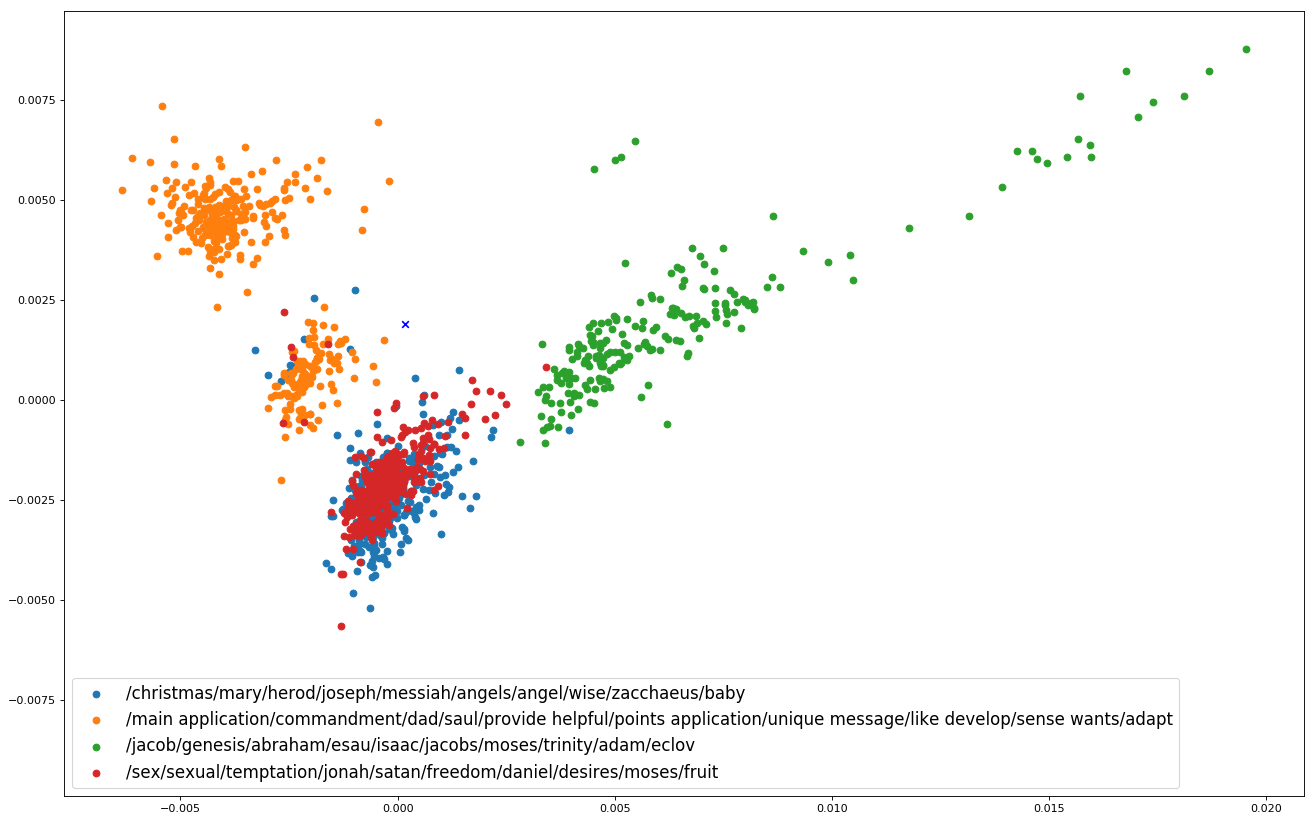

In [10]:
labels = get_label_indicies(4, kmeans.labels_)
fig = plt.figure(figsize=(20, 13), dpi= 80, facecolor='w', edgecolor='k')
ax1 = fig.add_subplot(111)

i = 0
for l in labels:
    ax1.scatter(two_d_data[l][:,0],two_d_data[l][:,1], label = legend[i])
    i+=1
ax1.scatter(kyle[:, 0], kyle[:, 1], c='b', marker = 'x')
plt.legend(prop={'size': 15})
plt.show()


In [84]:
test = get_label_indicies(5, kmeans.labels_)
two_d_data[test[0]][:, 1]

array([ 2.90227586e-04, -7.28033207e-03, -1.00411982e-02, -1.88427835e-03,
       -1.97185272e-03, -1.55462617e-03, -5.75773114e-03, -3.71568396e-03,
       -3.58486390e-03, -6.15799478e-03, -9.49174931e-03, -7.64241152e-03,
       -4.98056913e-03, -8.34558598e-03, -1.27102633e-02, -1.25129671e-02,
       -6.31926340e-03, -2.81153600e-03, -8.85022064e-03, -5.08005848e-03,
       -1.11853130e-03, -5.92226939e-03, -3.28394513e-03, -6.83882725e-03,
       -4.29804751e-03, -8.16796520e-03, -8.57057097e-03, -7.78920974e-03,
       -4.83534894e-03, -5.94117312e-03, -8.43049998e-03, -4.58180544e-03,
       -1.03949876e-02, -1.04087408e-02, -4.03444988e-03, -1.68922966e-03,
       -7.51274344e-03, -7.68999403e-03, -9.58258581e-03, -8.17339540e-03,
       -5.02270386e-03, -4.38058475e-03, -9.56302459e-03, -8.65200715e-03,
       -2.95801563e-03, -4.92136918e-03, -3.36020299e-03, -7.89773796e-04,
       -1.00185040e-02, -1.72028557e-03, -1.34620074e-03,  8.31313180e-04,
       -1.49761164e-03, -

In [9]:
kyle = []
f=open('./Charge that to my account.txt', "r")
if f.mode == 'r':
    kyle.append(f.read())
kyle = vect.transform(kyle)
kyle = kmeans.transform(kyle)
kyle = pca.transform(kyle)

In [23]:
vect.decode(corpus[0])

<1x2373672 sparse matrix of type '<class 'numpy.float64'>'
	with 259 stored elements in Compressed Sparse Row format>

In [4]:
import os
count = 0
for doc in os.listdir('./preachingtoday'):
    count +=1
count

802

In [32]:
corpus.shape

(1253, 65919)